In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# **Final Project for DTSA-5509**
# Introduction and problem description

Breast cancer is one of the most common and life-threatening diseases among women worldwide. Early detection and accurate diagnosis are crucial for effective treatment and improving survival rates. In the realm of machine learning, supervised learning methods have emerged as powerful tools for predicting and classifying diseases like breast cancer based on diagnostic data.  

This project focuses on applying supervised learning techniques, specifically **K-Nearest Neighbors (KNN)** and **Logistic Regression**, to classify breast cancer cases as either malignant or benign using the well-known [**Breast Cancer Wisconsin Dataset**](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) procured from Kaggle. This dataset contains features derived from digitized images of fine-needle aspirate (FNA) biopsies of breast masses, offering a rich source of data for analysis.

While we have covered a similar problem in class assignments earlier in the course, I wanted to try different options and test other models on the problem and import, clean and test the data on my own.

The primary objectives of this project are to understand and apply KNN and Logistic Regression models for classification tasks and compare the performance of these models in terms of accuracy, precision, recall, and other relevant metrics.  

By implementing and analyzing these models, we aim to gain insights into the suitability of each technique for breast cancer classification and highlight the strengths and limitations of each approach. This work underscores the potential of machine learning in supporting medical decision-making and improving diagnostic accuracy.

# Exploratory data analysis
The dataset can be downloaded as "breast-cancer.csv" from https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset. I will perform exploratory data analysis on the problem and utilize the extracted data to build my model.

As can be seen from the output, the data has many fields and duplicates. the model has entries for Mean values, Standard Error values, and worst values along with the diagnosis labeled with "M" for Malignant and "B" for benign.

In [136]:
df = pd.read_csv("/content/sample_data/breast-cancer.csv")
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [138]:
df = df.drop([ 'id'], axis =1)
print(df.shape)

(569, 31)


In [139]:
#checking for NA values
df.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   diagnosis                569 non-null    bool 
 1   radius_mean              569 non-null    bool 
 2   texture_mean             569 non-null    bool 
 3   perimeter_mean           569 non-null    bool 
 4   area_mean                569 non-null    bool 
 5   smoothness_mean          569 non-null    bool 
 6   compactness_mean         569 non-null    bool 
 7   concavity_mean           569 non-null    bool 
 8   concave points_mean      569 non-null    bool 
 9   symmetry_mean            569 non-null    bool 
 10  fractal_dimension_mean   569 non-null    bool 
 11  radius_se                569 non-null    bool 
 12  texture_se               569 non-null    bool 
 13  perimeter_se             569 non-null    bool 
 14  area_se                  569 non-null    bool 
 15  smooth

In [140]:
#converting the diagnosis labels to 1 for "M" Malignant, and 0 for "B" Benign
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]
df.diagnosis.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


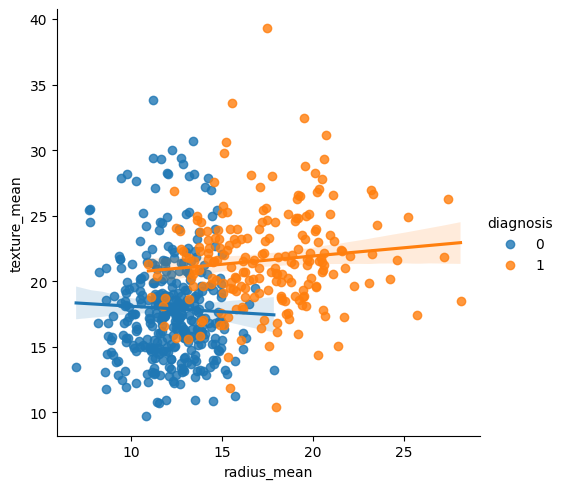

In [141]:
#visualizing the relationship between texture and radius
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

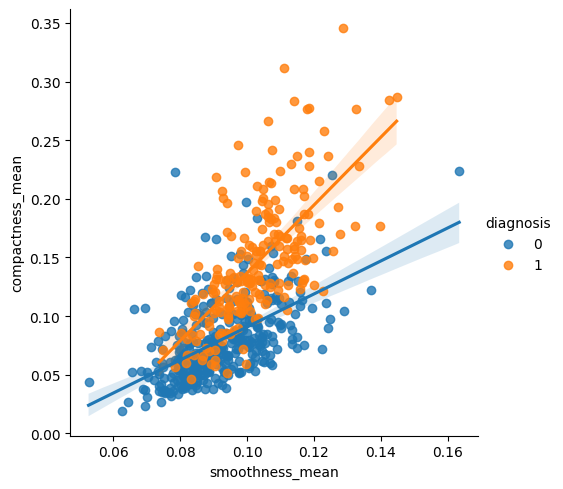

In [142]:
#visualizing the smoothness of the tumor vs compactness and the diagnosis
sns.lmplot(x = 'smoothness_mean', y = 'compactness_mean', hue = 'diagnosis', data = df)

In [143]:
matrix = df.corr()
print(matrix)
# there are too many values for the data in this case. so i will plot a heatmap for more visibility and prune some of the data points.


                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

<Axes: >

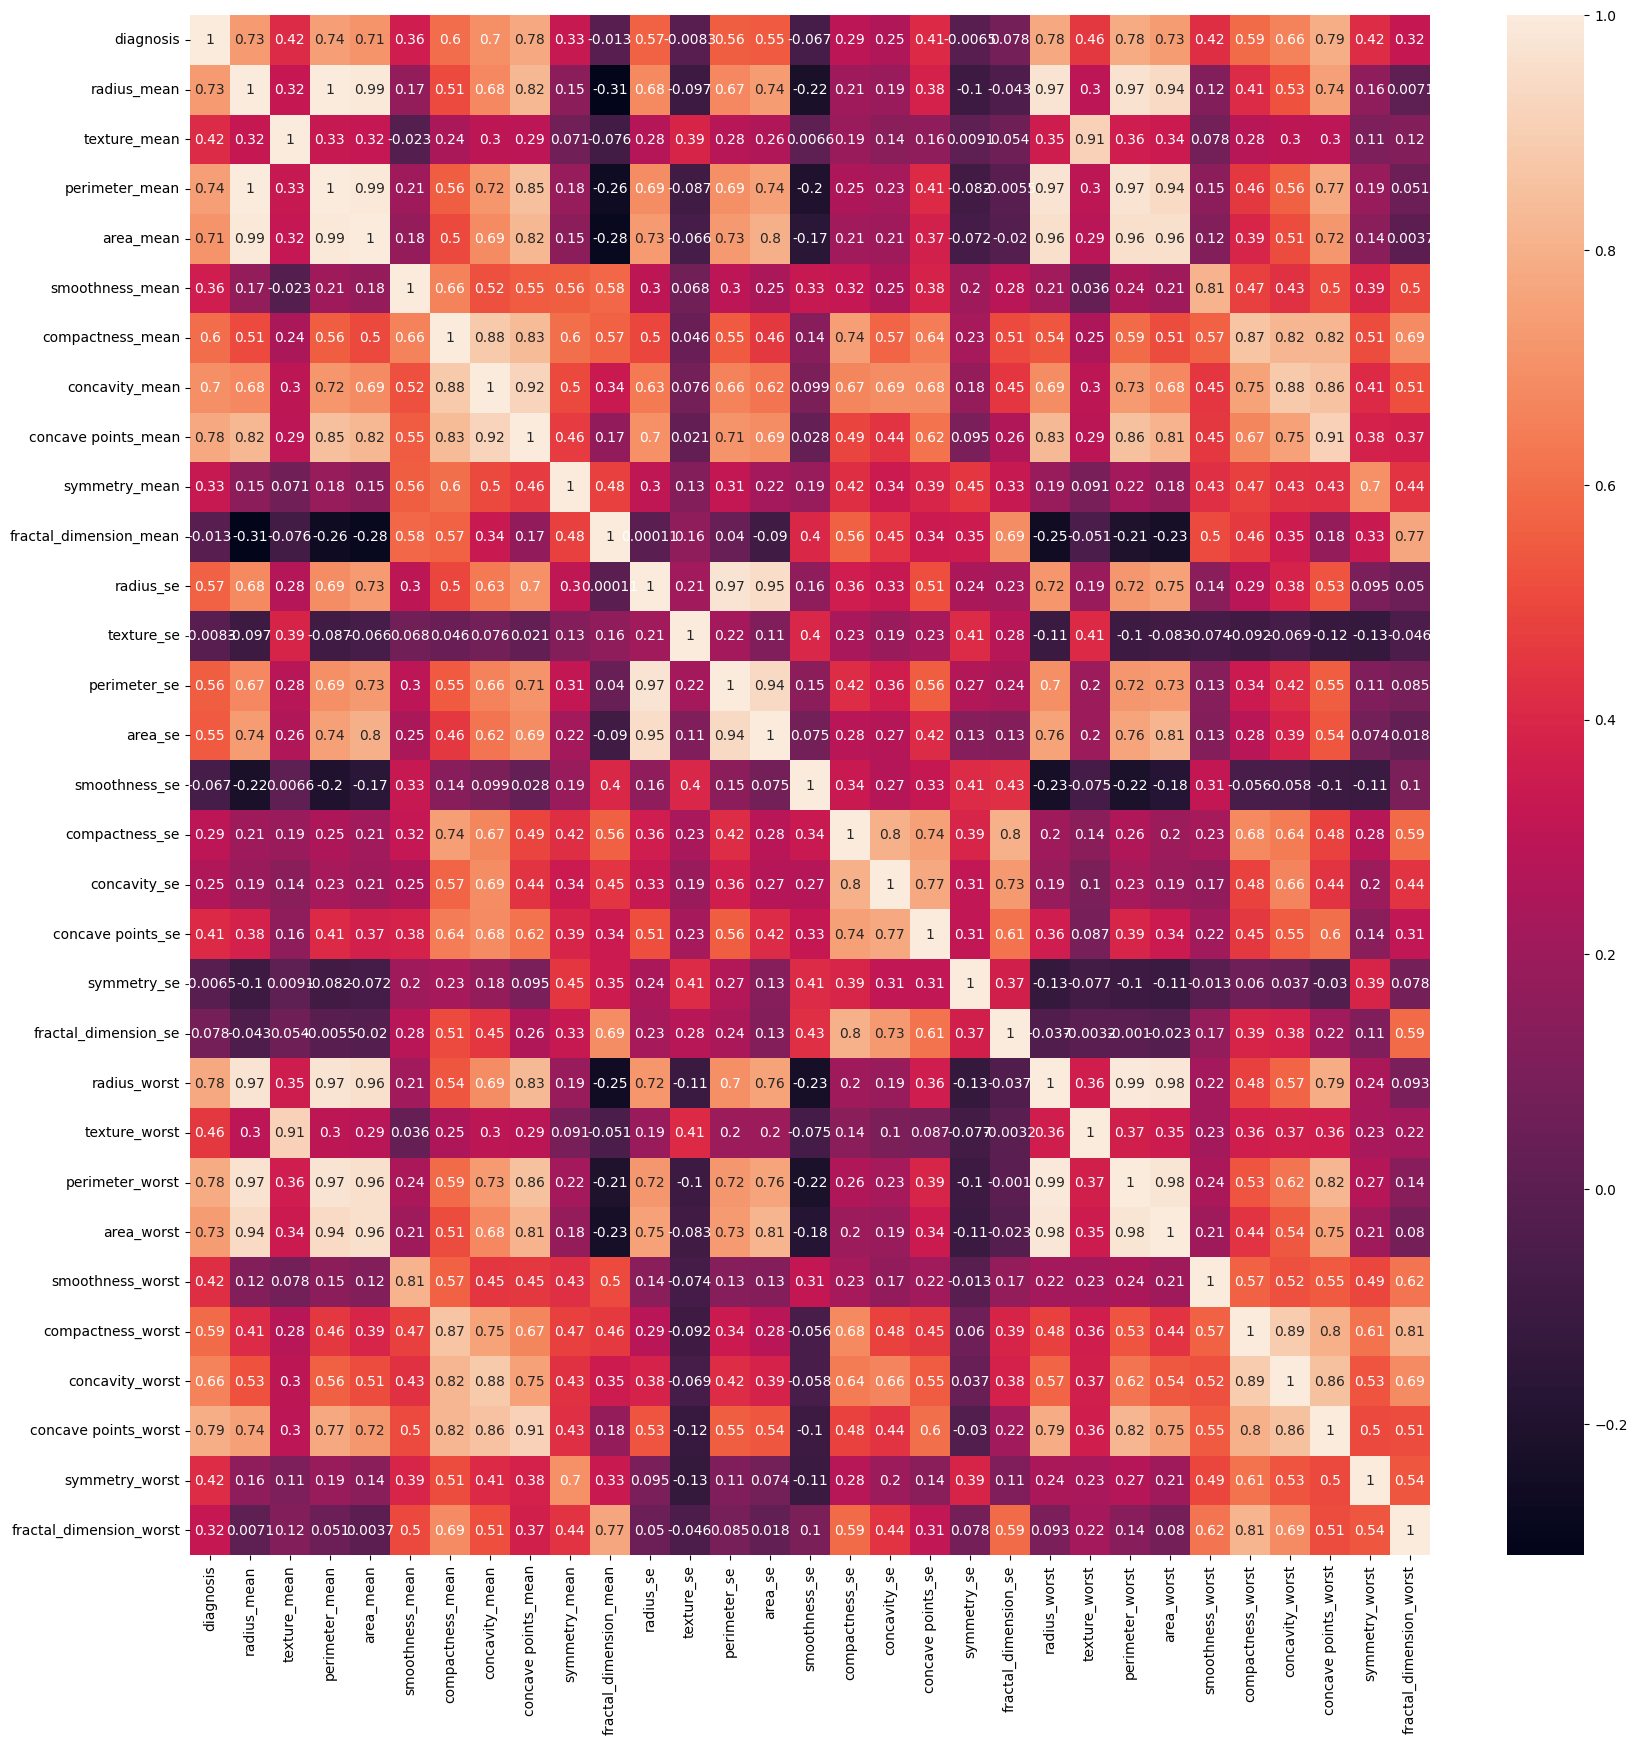

In [144]:
#correlation heatmap for the entire dataset
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(matrix, annot = True)

In the above cells, we have converted the diagnosis tags into numeric values with 1 being Malignant and 0 being benign, and plotted the relationship between some of the predictors in the dataset. As we can see from the plots, mean smoothness and mean compactness have correlation as well as mean texture and mean radius. From the color coding we can see that there is a correlation between the predictors and the diagnosis, however the boundary between the two is unclear.
    
With the correlation matrix we can see that there are many predictors and some of them overlap. As can be expected, the Standard Error values within the dataset do not hold much correlation with the response diagnosis. As such we will retain only the mean values and the worst values

In [146]:
# for this project I will drop the standard error columns for prediction due to the possible overfitting and irrelevant predictors.
df= df.drop([ 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
        'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'], axis = 1)

In [147]:
#This cell prints the features we will be using in the EDA, along with information about EDAdata.
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_worst             569 non-null    float64
 12  texture_worst            569 non-null    float64
 13  perimeter_worst          569 non-null    float64
 14  area_worst               5

In [148]:
matrix2 = df.corr()
print(matrix2)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_worst              0.

<Axes: >

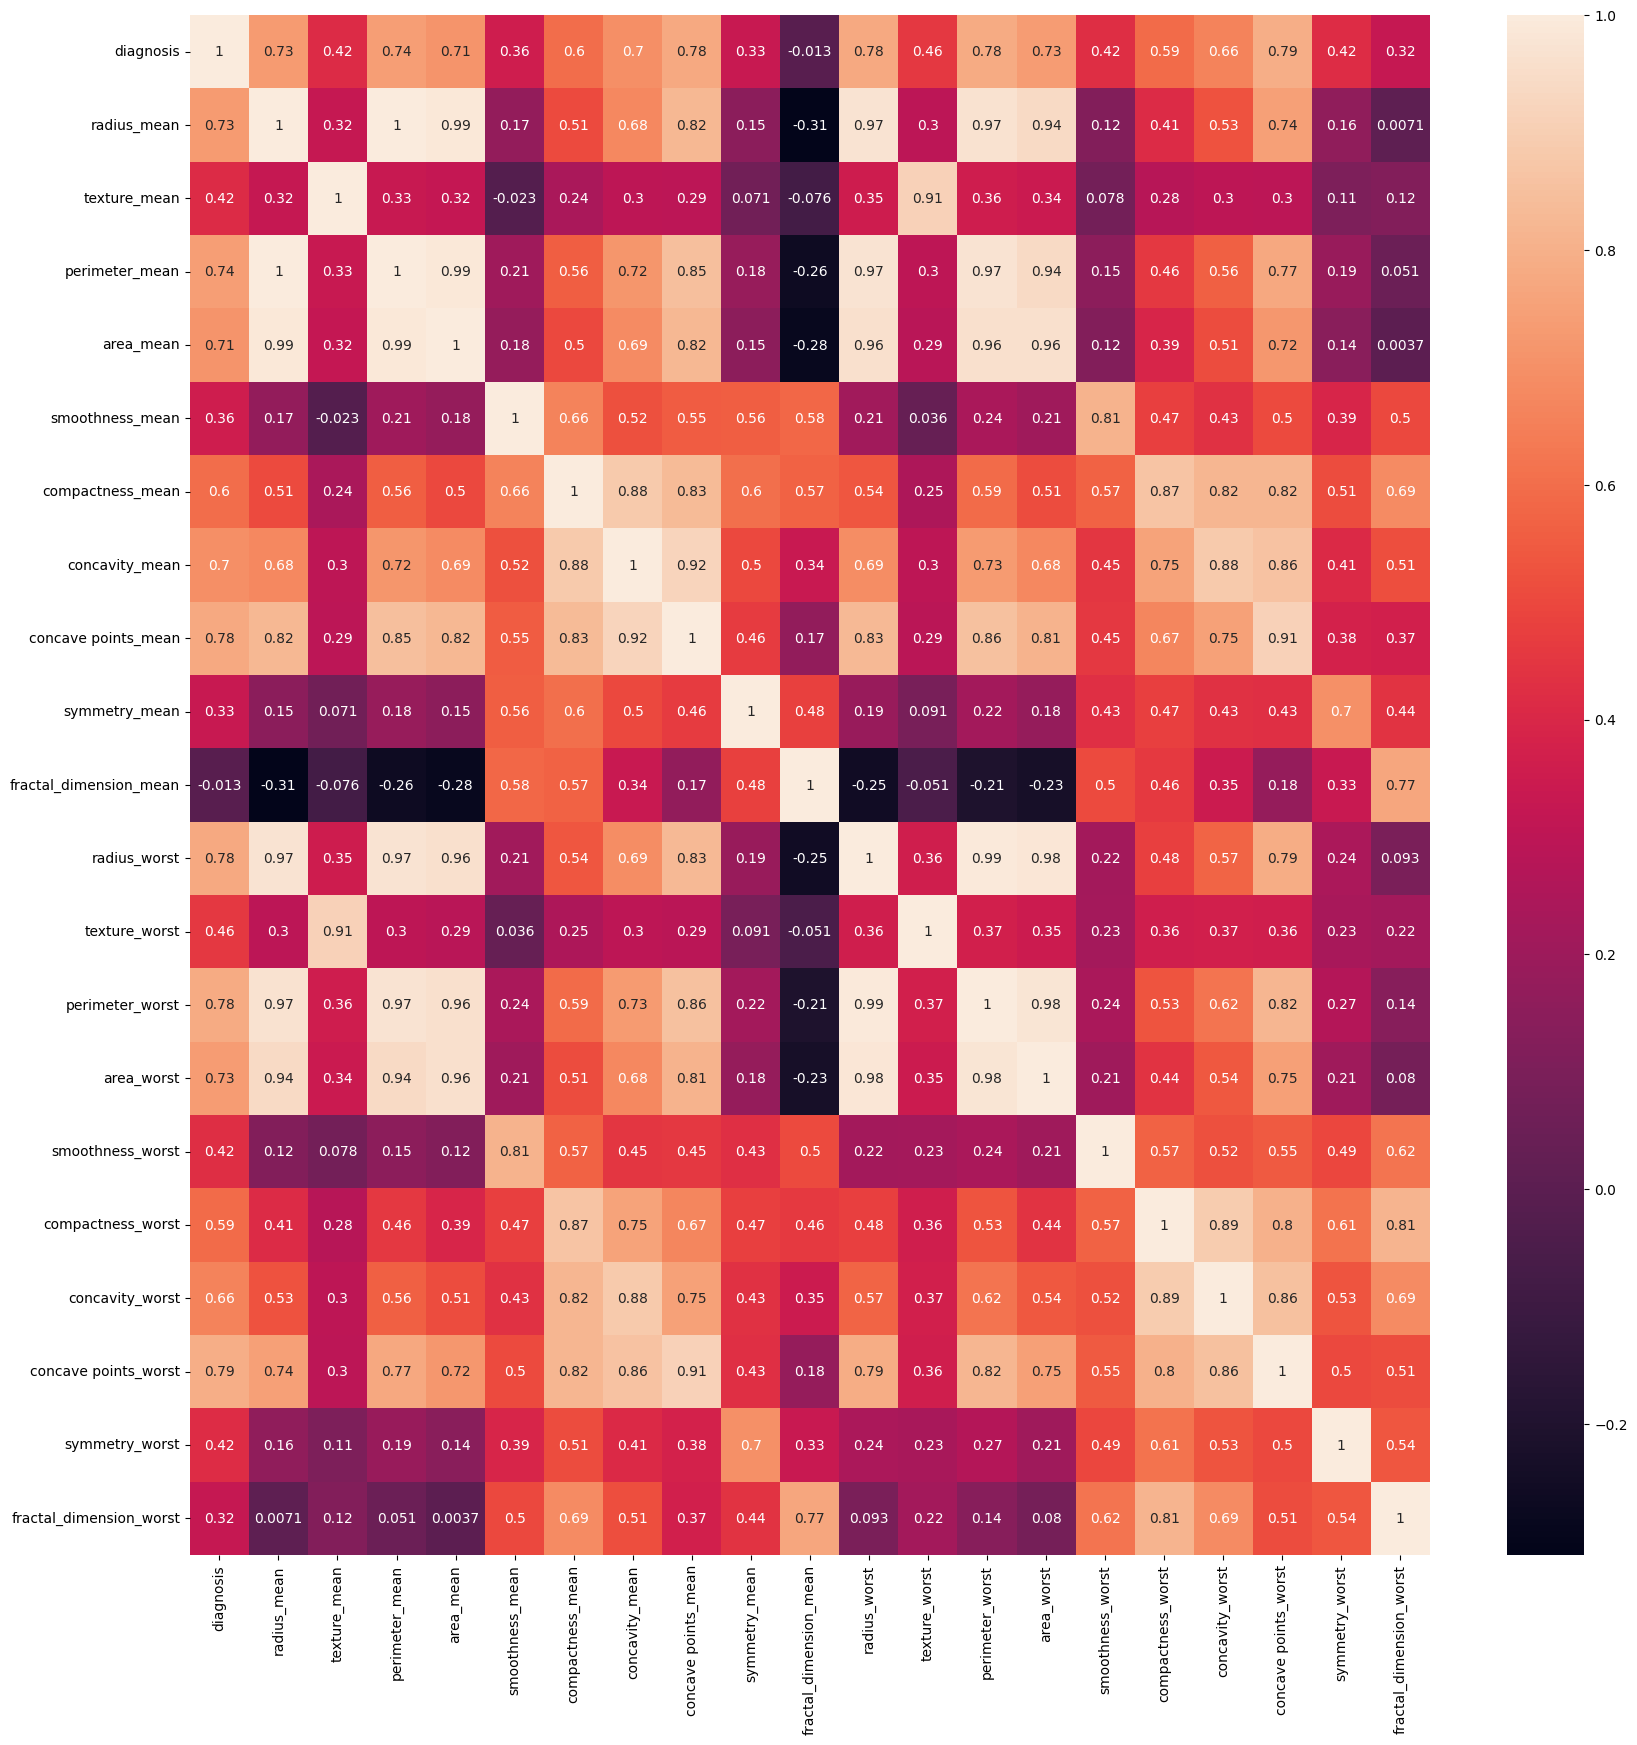

In [149]:
# This cell creates a correlation matrix for the EDAdata
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(matrix2, annot = True)

From this heatmap, we can see that the highest correlations with diagnosis is the mean of concave points. Following that is the perimeter, radius, area, and compactness. we can see that fractal dimension is not highly correlated with diagnosis, However it does have correlation with most other relevant categories with the highest being the mean of compactness of the lobe with correlation coefficient of 0.57. Through the heatmap and correlation matrix we can comclude that fractal_dimension, symmetry and smoothness are not as strong of predictors towards the diagnosis of cancer.

# **Analysis and Results**
## KNN classifier

I will use sklearn for models in this project. The KNN classifier I will use is sklearn.neighbors.KNeighbors().

In [150]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

In [172]:
#create training and test data partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [152]:
# Run GridSearchCV over KNN classifiers, find optimal value for K
KNN = KNeighborsClassifier()
param_try = {"n_neighbors": [i for i in range(1,13)]}
grid = GridSearchCV(estimator = KNN, param_grid = param_try)
grid.fit(X_train, y_train)
print(grid.best_params_, grid.best_score_)

{'n_neighbors': 7} 0.918591934381408


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


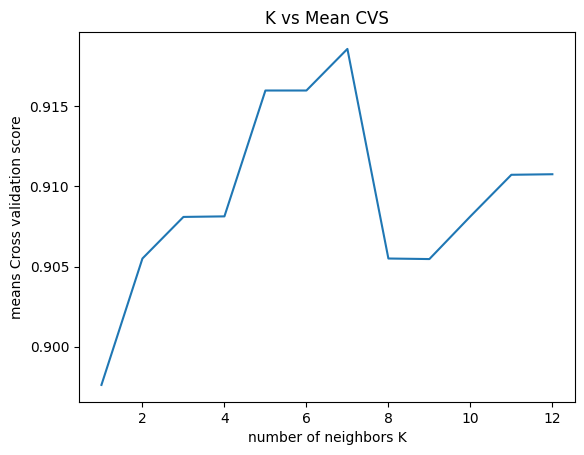

In [153]:
# This plots n_neighbors vs mean test score
KNNresulting = grid.cv_results_
KNN_results = pd.DataFrame(KNNresulting)
n_neighbors = list(KNN_results['param_n_neighbors'])
mean_score = list(KNN_results["mean_test_score"])

plt.plot(n_neighbors, mean_score)
plt.xlabel("number of neighbors K")
plt.ylabel('means Cross validation score')
plt.title('K vs Mean CVS')
plt.show()

In [154]:
#Accuracy of best KNN estimator
bestKNN  = grid.best_estimator_
yhat = bestKNN.predict(X_test)
model_accuracy = accuracy_score(y_true = y_test, y_pred = yhat)
print(model_accuracy)

0.973404255319149


In [155]:
#Testing the KNN model without gridsearchcv
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
	neighbors.append(k)
	knn = KNeighborsClassifier(n_neighbors = k)
	scores = cross_val_score(
		knn, X_train, y_train, cv = 10, scoring = 'accuracy')
	cv_scores.append(scores.mean())


The optimal number of neighbors is  7 


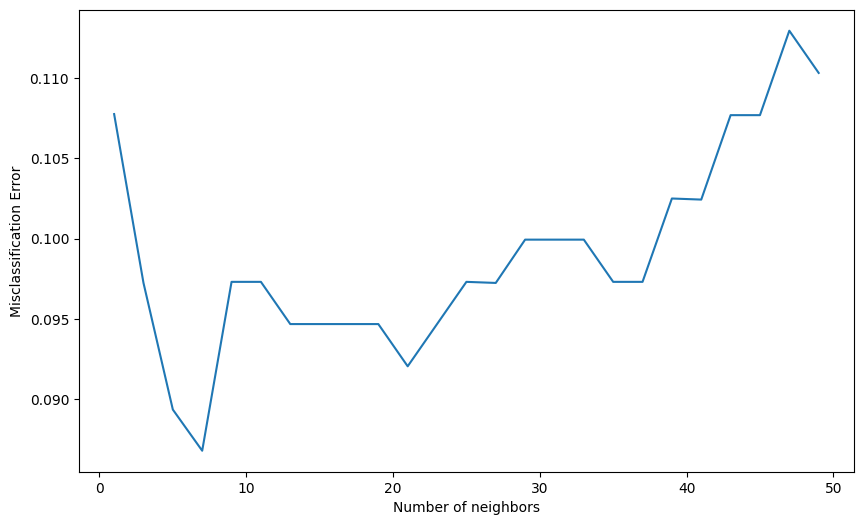

In [156]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()


# KNN classifier Analysis

In general, KNN classifiers run into issues when the user picks too high a value for K. High dimensional data can be quite sparse, and so allowing K to range too high amounts to the introduction of noise into the model. I ran a GridSearchCV on the data using 5-fold cross validation to optimize accuracy over a range of possible K values. The results are plotted above. K = 7 was the optimal choice as measured by mean CVS. The corresponding mean CVS was 0.918. The K = 7 model returned a test accuracy of 0.973, which is quite good.

## **Logistic Regression**
For Logistic Regression, I will normalize the X values within the data and create a Logistic Regression Model utilizing weights and bias to forward propogate and update parameters until a best model is found.  

In [160]:
y = df.diagnosis.values
x_data = df.drop(['diagnosis'], axis = 1)


In [161]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))



In [162]:

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.15, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (20, 483)
x test:  (20, 86)
y train:  (483,)
y test:  (86,)


In [163]:
#adding weights and bias into the mix
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

In [164]:

def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [165]:
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    # x_train.shape[1]  is for scaling
    cost = (np.sum(loss)) / x_train.shape[1]

    # backward propagation
    derivative_weight = (np.dot(x_train, (
        (y_head - y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(
        y_head-y_train) / x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,
                 "derivative_bias": derivative_bias}
    return cost, gradients

In [169]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)

        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration % i: % f" %(i, cost))

    # update(learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation ='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [170]:
def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test)+b)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    # if z is bigger than 0.5, our prediction is sign one (y_head = 1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head = 0),
    for i in range(z.shape[1]):
        if z[0, i]<= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction

Cost after iteration  0:  0.692876
Cost after iteration  10:  0.638773
Cost after iteration  20:  0.614002
Cost after iteration  30:  0.591943
Cost after iteration  40:  0.572217
Cost after iteration  50:  0.554526
Cost after iteration  60:  0.538599
Cost after iteration  70:  0.524202
Cost after iteration  80:  0.511131
Cost after iteration  90:  0.499215


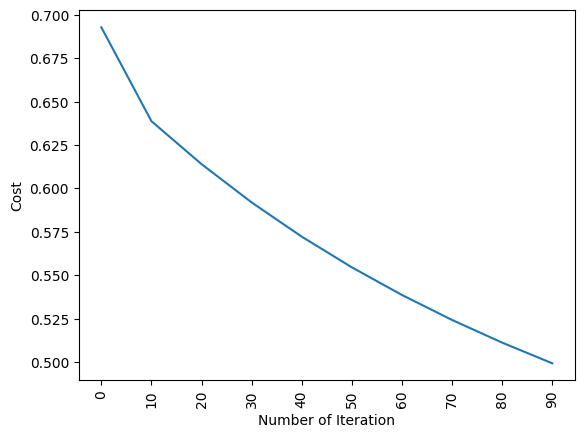

train accuracy: 80.74534161490683 %
test accuracy: 81.3953488372093 %


In [171]:
def logistic_regression(x_train, y_train, x_test, y_test,
                        learning_rate,  num_iterations):

    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(
        w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(
        parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(
        parameters["weight"], parameters["bias"], x_train)

    # train / test Errors
    print("train accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test,
                    y_test, learning_rate = 1, num_iterations = 100)

# Logistic Regression analysis
The logistic regression model produced a training accuracy of 80.7% and a test accuracy of 81.4%, indicating that the model generalizes well to unseen data. The close alignment between training and test accuracies suggests that the model does not overfit the training data, which is a positive outcome for this supervised learning approach.

The cost function values recorded over 100 iterations reveal a steady decline, demonstrating effective optimization of the model's parameters. Key observations include:

The cost at iteration 0 was 0.692876, reflecting the model's performance with initial random weights. By iteration 90, the cost dropped to 0.499215, indicating a significant improvement in the model's ability to classify the data. The consistent decrease in cost values highlights the convergence of the gradient descent algorithm used in logistic regression. This suggests the learning rate was appropriately chosen to balance convergence speed and stability.
## Model Performance Evaluation

The test accuracy of 81.4% is satisfactory for a basic implementation. However, it also suggests there is room for improvement, especially if higher accuracy is required for critical medical diagnostics.

The declining cost values reflect the model's improved alignment between predicted and actual labels over iterations.
By iteration 90, the cost plateaued, implying that further training may not yield significant gains without adjustments to the model or preprocessing.

The logistic regression model effectively captured the linear relationships in the dataset, as evidenced by its reasonable accuracy and cost minimization.
However, the dataset's features may not be entirely linearly separable, potentially limiting the model's performance. Non-linear models (e.g., SVM with kernels or tree-based methods) could be explored for comparison.


### Conclusion  

In this project, we explored two supervised learning algorithms, Logistic Regression and K-Nearest Neighbors (KNN), to classify breast cancer cases using the Breast Cancer Wisconsin Dataset. Both models provided valuable insights and demonstrated strong performance, with KNN showing exceptional accuracy in this particular application.  

The **Logistic Regression** model achieved a training accuracy of 80.7% and a test accuracy of 81.4%, indicating reasonable generalization. The steady decline in the cost function during training confirmed effective optimization. While the model is well-suited for capturing linear relationships in data, its performance may be limited by the dataset's non-linear complexities, suggesting opportunities for improvement through advanced feature engineering or model selection.  

The **KNN classifier**, optimized using GridSearchCV with 5-fold cross-validation, demonstrated the importance of selecting the appropriate value for \( K \). High-dimensional data can exacerbate the sparsity problem, leading to noise if \( K \) is set too high. The grid search identified \( K = 7 \) as the optimal value, yielding a mean cross-validated score (CVS) of 0.918 and an outstanding test accuracy of 0.973. This result underscores KNN's ability to handle multi-category classification effectively when tuned properly.  

### Key Takeaways  
1. Logistic Regression provides an interpretable and effective baseline model but may underperform in cases of complex data distributions.  
2. KNN can achieve remarkable accuracy with careful hyperparameter tuning, though it may become computationally expensive with large datasets or high dimensions.  
3. The choice of model depends heavily on the dataset characteristics, such as feature separability, dimensionality, and computational constraints.  

In conclusion, while Logistic Regression offers a simpler approach with decent performance, KNN, when properly tuned, can excel in classification tasks involving multiple categories. Future work could involve exploring additional algorithms (e.g., SVMs or ensemble methods), further feature engineering, or dimensionality reduction techniques to enhance both models' performance and efficiency.

# Bibliography

https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset



System information

In [175]:
import platform
print(platform.platform())
print(platform.processor())
print(platform.python_version())

Linux-6.1.85+-x86_64-with-glibc2.35
x86_64
3.10.12
